# Team Mango Component Three

## Author: Hanlin Zhang

### Approach 
Applied Pandas structural adaptations
Applied Ipywidgets dropbox to select category
Adapted On Street Map(OSM) to project scatter points on map
Applied Ipywidgets interactive plot to plot based on selected category 
Formed linear regression model to explore the relationship between quants
Polted 3D linear regression model using library scatter3d in R 

### Strengths : 
Plot longitude and latitude based on select category
Explore linear relationships in R and plot in 3D
### Weaknesses: 
Things became awkward if there is no linear relationship
### Further ideas:
Add new methodology to study the name column.
Generalize functions from a higher dimension 


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import matplotlib.patches as mpatches
import cartopy.io.shapereader as shpreader

In [3]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed
from IPython.display import display
from IPython.display import clear_output

In [4]:
sample = pd.read_csv("/home/hanlinz3/work/data-readonly/sample_project/sample_flat.csv")

In [5]:
sample

,names,dates,latitude,longitude,categorical,quant1,quant2,quant3
0,b'Rawad',1.453009e+09,-19.988651,-41.435565,Category01,1.933239,6.052785,6105.123120
1,b'Eurma',1.471779e+09,-8.593256,27.742604,Category00,1.520733,-11.065076,143.902725
2,b'Taleia',1.473613e+09,-67.463164,-109.366796,Category04,1.863466,11.437340,2019.370225
3,b'Niley',1.481194e+09,-7.537010,-32.218540,Category03,0.745431,19.415543,3225.920647
4,b'Acey',1.454403e+09,-17.116866,2.949914,Category05,1.031100,17.714492,4976.099324
5,b'Obert',1.463099e+09,86.050560,-138.759294,Category00,0.820424,-28.240086,9725.990286
6,b'Kadel',1.481066e+09,53.965137,-174.545084,Category04,3.485479,9.613104,8133.741192
7,b'Jaiyanna',1.461933e+09,37.910119,-135.568743,Category04,0.635373,-0.084906,8340.323743
8,b'Haylei',1.469303e+09,-79.231809,168.419140,Category07,0.802668,17.993627,4695.368570
9,b'Ayhem',1.454702e+09,33.318067,56.065283,Category09,2.353746,-9.800971,1558.909278


In [6]:
category = list(sample['categorical'].drop_duplicates().values)

In [7]:
category.sort()

In [8]:
cat_display = widgets.Dropdown(
    options=category,
    description=u'Category',
    disabled=False,
    continuous_update=True
)

In [18]:
def draw_map():
    display(cat_display)
    select = sample['categorical'] == cat_display.value

    lat, lon=43.979, -117.583
    dlat, dlon=28, 55
    osm_tiles=OSM()
    plt.figure(figsize=(15,15))
    ax = plt.axes(projection=osm_tiles.crs)
    ax.set_extent([lon-dlon,lon+dlon,lat - dlat, lat + dlat])
    ax.add_image(osm_tiles,6)
    ax.stock_img()

    ax.scatter(list(sample["longitude"][select]),list(sample["latitude"][select]),transform=ccrs.PlateCarree())
    plt.show()

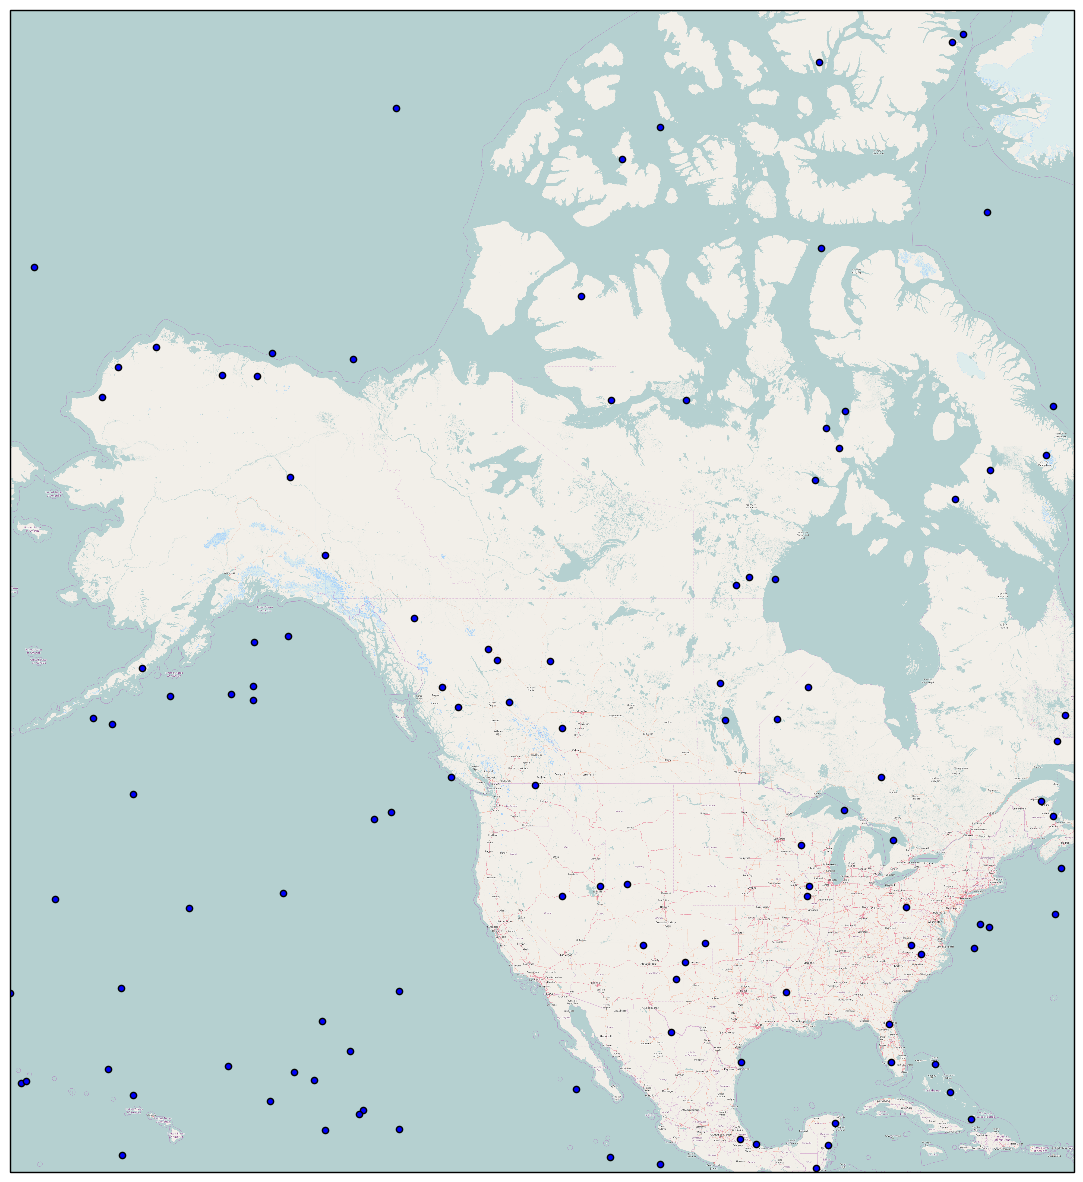

<function __main__.draw_map>

In [19]:
widgets.interact(draw_map)

In [11]:
len(sample["names"].unique())

9501